In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [5]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Задание 9.1.**
 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

C:\Users\geras\AppData\Local\Temp\ipykernel_7640\303330324.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


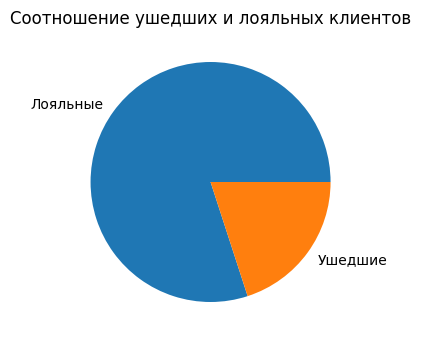

In [19]:
df = churn_data[['Exited']].copy()

# Вычисляем процентное соотношение ушедших
# Округлим результат до целых
df_churn = (df.mean() * 100).round(0).astype(int)

# Строим график
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    [100 - df_churn.values[0], df_churn.values[0]], 
    labels= ['Лояльные', 'Ушедшие']
)

# Добавляем название графика
axes.set_title('Соотношение ушедших и лояльных клиентов')

fig.show()

Исходя из диаграммы видно, что количество ушедших клиентов не превышает 1/4 доли от общего количества клиентов банка. Следовательно можно сделать вывод о том, что у банка присутствуют некоторые проблемы с лояльностью клиентов, однако в большей степени политику банка можно назвать успешной

**Задание 9.2.** Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

C:\Users\geras\AppData\Local\Temp\ipykernel_7640\1251720764.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


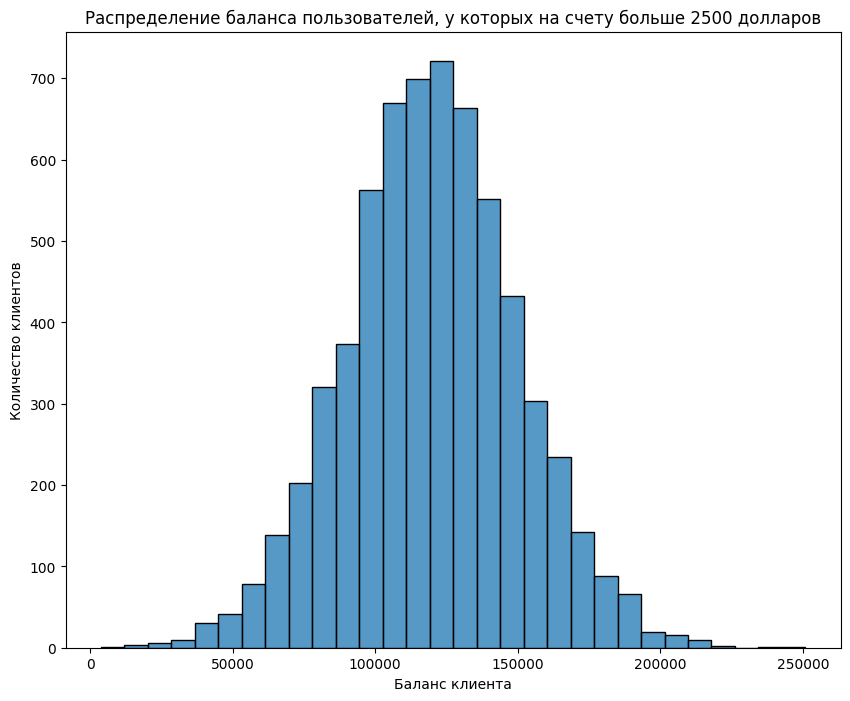

In [21]:
# Фильтруем клиентов с балансом более 2500 долларов
new_balance = churn_data[churn_data['Balance'] > 2500]

# Строим координатную плоскость
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

# Строим график
sns.histplot(
    data=new_balance,
    x='Balance',
    bins=30,
)

axes.set_title('Распределение баланса пользователей, у которых на счету больше 2500 долларов')
axes.set_xlabel('Баланс клиента')
axes.set_ylabel('Количество клиентов')

fig.show()

По графику видно, что у большинства клиентов с балансом более 2500 долларов он находится в диапазоне между 100000 и 150000 долларов. Далее с увеличением суммы, лежащей на счету, количество клиентов заметно снижается

**Задание 9.3.** Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [32]:
# Отбираем необходимые признаки
df_churn = churn_data[['Balance', 'Exited', 'CustomerId']].copy()

# Создадим сводную таблицу, сгруппируем и подпишем данные
df = df_churn.pivot_table(
    index='Balance', # Будущие строки
    columns='Exited', # Будущие столбцы
    values='CustomerId', # Столбец, по которому получим сводные данные для значений
    aggfunc='count' # Функция, применяемая к value - подсчет
)
df = df.rename(columns={1: 'Ушедшие', 0: 'Лояльные'}) # Добавим названия 

# Строим график
fig = px.histogram(
    data_frame=df,
    x=df.index, # Отображаем по оси х баланс клиентов
    y=df.columns, # По оси у - количество клиентов
    nbins=30, # Количество столбцов
    text_auto=True, # Отобразим надписи на столбцах
    title='Зависимость баланса клиентов и их лояльности', # Заголовок
    width=700, # Ширина графика
    height=500, # Высота графика
    labels={'Exited': 'Статус клиента: '} # Легенда
)

# Добовляем метки осей
fig.update_xaxes(title_text='Баланс клиента')
fig.update_yaxes(title_text='Количество клиентов')

fig.show()

Исходя из графика можем сделать следующие выводы:

- Пик в начале графика говорит о том, что в банке большое количество клиентов, у которых на счету лежит небольшая сумма. Это может быть связано с тем, что банк предложил выгодные условия для новых клиентов, и большинство из них остались постоянными.

- Для клиентов, вероятно пользующихся услугами банка регулярно, самое их большое количество приходится на диапазон 95 - 150 тыс долларов. Это относится как к лояльным, так и к ушедшим клиентам. Однако доля ушедших клиентов в этом диапазоне выше, чем за его пределами.

- Малое количество ушедших клиентов по краям графика указывает вероятнее всего на то, что клиенты были заинтересованы в разовом пополнении счета, возможно для получения большего размера процента по вкладу, после чего покинули банк

**Задание 9.4.** Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [49]:
# Собираем необходимые данные
df_churn = churn_data[['Age', 'Exited', 'CustomerId']].copy()

# Группируем данные, добавляем подписи
df = df_churn.groupby('Age', as_index=False)['Exited'].mean() #.round(2)

# Строим график
fig = px.box(
    data_frame=churn_data,
    x='Exited', # По оси х - количество ушедших и лояльных клиентов
    y='Age', # По оси y - возраст клиента
    width=700, # Щирина
    height=500, # Высота
    points='outliers', # Отображение выбросов
    title='Распределение оттока клиентов в зависимости от возраста'
)

# Подписываем оси
fig.update_layout(
    xaxis_title='Статус клиента',
    yaxis_title='Возраст клиента'
    )

fig.show()

Из графика видно, что наибольшее количество ушедших клиентов приходится на возраст 39-51 годов. Следовательно, банку необходимо обратить внимание на эту возрастную группу.

Потенциальные выбросы есть как среди лояльных, так и среди ушедших клиентов, однако, наиболее бросающийся в глаза выброс - 84 года среди ушедших клиентов

In [ ]:
# Добавляем столбец
df['Churn'] = (df['Exited'] * 100).astype(int) # Процентное соотношение оттока

# Построим столбчатую диаграмму
fig = px.bar(
    data_frame=df,
    x='Age', # Ось х - возраст
    y='Churn', # Ось у - количество лояльных и ушедших клиентов
    width=700, # Ширина
    height=500, # Высота
    title='Распределение оттока клиентов в зависимости от возраста',
    text='Churn', 
    color='Churn', # Окрашивание графика по величине оттока
)

fig.update_layout(
    bargap = 0.1, # Ширина вертикальной разделительной полосы
    xaxis_title = 'Возраст клиента',
    yaxis_title = 'Величина оттока'
)

fig.show()

**Задание 9.5.** Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [12]:
# Отбираем необходимые признаки
df_churn = churn_data[['CreditScore', 'EstimatedSalary', 'Exited']].copy()

# Для выявления взаимосвязи строим диаграмму рассеяния
fig = px.scatter(
    data_frame=df_churn,
    x='EstimatedSalary', 
    y='CreditScore',
    color='Exited'
)

fig.update_layout(
    title='Взаимосвязь кредитного рейтинга клиентов и их заработной платы',
    xaxis_title='Кредитный рейтинг',
    yaxis_title='Зарплата клиента'
)

fig.show()

Исходя из графика можно сделать вывод, что зависимость кредитного рейтинга от зарплаты клиента отсутствует

**Задание 9.6.** Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

*Подсказка*
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

In [15]:
# Отбираем данные
df_churn = churn_data[['Gender', 'Exited']].copy()

# Определим доли ушедших и лояльных клиентов
df = (churn_data.pivot_table(
    index='Gender',
    values='Exited',
    aggfunc='mean'
) * 100).round().astype(int)
# Добавляем новый столбец с лояльностью
df['Loyal'] = 100 - df['Exited']
# Переименовываем для подписей в легенде
df = df.rename(columns={'Exited': 'Доля ушедших', 'Loyal': 'Доля лояльных'})

# Для распределения по категориям строим столбчатую диаграмму
fig = px.bar(
    data_frame=df,
    x=df.index, # Для оси х - пол клиента
    y=df.columns, # Ось у - доля от общего числа ушедших
    barmode='stack', # Отображаем сгруппированные столбцы вертикально
    width=500, # Ширина
    height=500, # Высота
    text_auto=True, # Отображение подписей на столбцах
    color_discrete_map={'Доля ушедших': 'red', 'Доля лояльных': 'purple'},
    title='Зависимость лояльности от пола клиента', 
    labels={'variable': 'Статус клиента: '} # Заголовок легенды
)

fig.update_layout(
    xaxis_title='Пол',
    yaxis_title='Доля от общего количества клиентов',
)

fig.show()



По графику видно, что чаще уходят женщины

**Задание 9.7.** Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [ ]:
# Отбираем необходимые данные
df_churn = churn_data[['Exited', 'NumOfProducts', 'CustomerId']].copy()

# Строим сводную таблицу
df = df_churn.pivot_table(
    index='NumOfProducts', # Строки
    columns='Exited', # Столбцы
    values='CustomerId', # Значения
    fill_value=0, # Заменяем пустые значения на 0
    aggfunc='count' # Применяем функцию подсчета
)

# Вычисляем процентные доли ушедших и лояльных клиентов
df = df.rename(columns={1: 'Ушедшие', 0: 'Лояльные'}) 
df['Доля ушедших'] = (df['Ушедшие'] * 100 / (df['Лояльные'] + df['Ушедшие'])) 
df['Доля лояльных'] =  100 - df['Доля ушедших'] 

# Строим столбчатую диаграмму
fig = px.bar(
    data_frame=df,
    x=df.index, # Количество услуг
    y=['Доля лояльных', 'Доля ушедших'], # Процентная доля 
    barmode='group', # Расположение по горизонтали
    title='Зависимость оттока клиентов от числа приобретенных услуг',
    labels={'variable': 'Статус клиента: '}, # Подпись на легенде
    text_auto=True, # Отображение значений
    width=500, # Ширина
    height=500, # Высота
)
fig.update_layout(
    xaxis_title='Количество услуг',
    yaxis_title='Доля от общего количества клиентов, %'
)

fig.show()

Из графика видно, что наименьший отток клиентов наблюдается при количестве услуг равном 2. Максимальный отток у клиентов, которые приобрели 4 услуги

**Задание 9.8.** Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [30]:
# Отбираем необходимые данные
df_churn = churn_data[['IsActiveMember', 'Exited', 'CustomerId']].copy()

# Строим сводную таблицу
df = df_churn.pivot_table(
    index='IsActiveMember', # Строки
    columns='Exited', # Столбцы
    values='CustomerId', # Значения
    fill_value=0, # Заменяем пустые значения на 0
    aggfunc='count' # Проводим подсчет
)
# Вычисляем доли ушедших и лояльных клиентов
df= df.rename(columns = {1: 'Ушедшие', 0: 'Лояльные'})
df['Доля ушедших'] = (df['Ушедшие'] * 100 / (df['Ушедшие'] + df['Лояльные']))
df['Доля лояльных'] = 100 - df['Доля ушедших']

# Строим столбчатую диаграмму, так как имеем распределение по группам
fig = px.bar(
    data_frame=df,
    x=df.index, # Статус активного клиента
    y=['Доля ушедших', 'Доля лояльных'],
    barmode='group', # Столбцы горизонтально
    title='Зависимость оттока от наличия активного ствтуса клиента',
    width=500, # Ширина
    height=500, # Высота
    text_auto=True, # Отображение значений 
    labels={'variable': 'Статус клиента: '} # Подпись на легенде
)

fig.update_layout(
    xaxis_title='Статус активного клиента',
    yaxis_title='Доля от общего числа клиентов, %'
)

fig.show()

График показывает, что клиенты, имеющие статус активного клиента, покидают банк реже, чем клиенты, не имеющие этого статуса. Следовательно, наличие статуса активного клиента может существенно влиять на лояльность клиентов.
В качестве действий банка можно предложить следующее:

- Сбор обратной связи от ушедших клиентов с выполнением корректирующих действий в плане оказания качества услуг;

- Предоставление неактивным клиентам персональных предложений на основе запрашиваемых ими услуг банка;

- Предложение повышенной ставки по вкладам или скидки на обслуживание за приобретение услуги "Здесь и сейчас"

**Задание 9.9.** В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [34]:
# Проводим отбор необходимых данных
df_churn = churn_data[['Geography', 'Exited', 'CustomerId']].copy()

# Строим сводную таблицу
df = df_churn.pivot_table(
    index='Geography', # Строки
    columns='Exited', # Столбцы
    values='CustomerId', # Значения
    fill_value=0, # Замена пустых значений на 0
    aggfunc='count' # Подсчитываем количество
)
# Подсчитываем процентные доли
df = df.rename(columns = {1: 'Ушедшие', 0: 'Лояльные'})
df['Доля ушедших'] = (df['Ушедшие'] * 100 / (df['Ушедшие'] + df['Лояльные']))
df['Доля лояльных'] = 100 - df['Доля ушедших']

# Строим тепловую географическую карту
fig = px.choropleth(
    data_frame=df,
    locations=df.index, # Столбец с локациями
    locationmode = 'country names', # Режим сопоставления локаций с базой Plotly
    color='Доля ушедших', # От чего зависит цвет
    range_color=[0, 70], # Диапазон цвета
    title='Доля ушедших клиентов по странам, %',
    width=700, # Ширина
    height=700, # Высота
    color_continuous_scale='Reds' # Палитра цветов
)

fig.show()

C:\Users\geras\AppData\Local\Temp\ipykernel_10924\2863688845.py:18: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



По графику видно, что большее число ушедших клиентов находится в германии. Возможно, это связано с тем, что условия банка и менталитет населения в разных странах могут отличаться

**Задание 9.10.** Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(50.722222222222214, 0.5, 'Категория кредитного рейтинга')

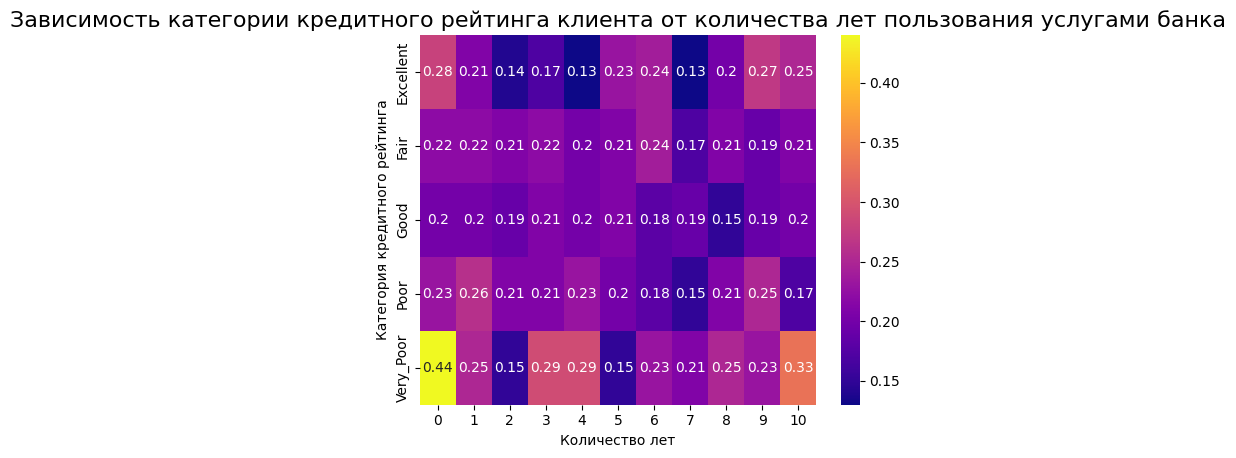

In [46]:
df_churn = churn_data.copy()

# Переводим признак CreditScore в категориальный с помощью get_credit_score_cat

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
df_churn['CreditScoreCat'] = df_churn['CreditScore'].apply(lambda x: get_credit_score_cat(x)).astype('category')

# Строим сводную таблицу
df = df_churn.pivot_table(
    index='CreditScoreCat', # Строки - новый категориальный признак
    columns='Tenure', # Столбцы - сколько лет клиент пользуется услугами банка
    values='Exited', # Значения - отток
    fill_value=0, # Замена пустых значений на 0
    aggfunc='mean', # Среднее по признаку оттока
    observed=True # Будут отображаться только наблюдаемые значения для категориальных группировок
).round(2) # Округляем до второго знака

# Строим тепловую карту с аннотацией
# Приводим значения к строковому типу
#pivot.columns = pivot.columns.astype('string')
#fig = plt.figure(figsize=(10, 5))

# Строим тепловую карту
heatmap = sns.heatmap(
    data=df,
    cmap='plasma',
    annot=True,
)

heatmap.set_title('Зависимость категории кредитного рейтинга клиента от количества лет пользования услугами банка', fontsize=16)
heatmap.set_xlabel('Количество лет')
heatmap.set_ylabel('Категория кредитного рейтинга')

Исходя из графика можно сделать вывод, что чаще остальных банк покидают клиенты из категории Very_Poor, пользующиеся услугами банка менее 1 года